In [4]:
import os 

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [5]:
main_dir = os.path.abspath('..') # os.path.join(os.getcwd())
data_dir = os.path.join(main_dir, "Data")
shapefiles_dir = os.path.join(main_dir, data_dir, "shapefiles")

In [9]:
covid_data = pd.read_csv(os.path.join(data_dir, "Merged", "daily_crime_during_COVID.csv"), index_col=0)
del covid_data['date']
covid_data.sample(5)

,daily_crime_count,covid_daily_case_count,covid_deaths,CT_ARSON_DR,CT_ASSAULT_DR,CT_BURGLARY_DR,CT_HOMICIDE_DR,CT_MOTOR_THEFT_DR,CT_ROBBERY_DR,CT_SEX_ABUSE_DR,...,CL_WARD_2_DR,CL_WARD_3_DR,CL_WARD_4_DR,CL_WARD_5_DR,CL_WARD_6_DR,CL_WARD_7_DR,CL_WARD_8_DR,CO_SHIFT_MORNING_DR,CO_SHIFT_EVENING_DR,CO_SHIFT_MIDNIGHT_DR
150,60,12398,587,0,3,3,0,12,2,0,...,8,9,2,4,12,12,5,15,37,8
83,57,8538,460,0,6,6,0,13,4,1,...,10,3,5,6,10,12,4,20,21,16
354,58,39943,1001,0,3,2,0,4,3,1,...,5,4,9,8,13,4,8,20,30,8
56,41,4797,240,0,5,3,0,3,2,0,...,3,3,3,12,2,5,8,14,19,8
553,92,56966,1165,0,3,0,1,9,5,1,...,29,3,5,13,13,10,9,35,34,23


In [11]:
X = covid_data.loc[:, covid_data.columns != 'daily_crime_count'].values
y = covid_data['daily_crime_count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Using Standard Scaler on Data:

In [12]:
Stand_scaler = StandardScaler() # or MinMaxScaler()
Stand_scaler.fit(X_train)

X_train_Stand_scaled = Stand_scaler.transform(X_train)
X_test_Stand_scaled = Stand_scaler.transform(X_test)

print(X_train_Stand_scaled[:2])

print(X_test_Stand_scaled[:2])

[[ 1.22929646  1.08387376 -0.14019993  2.45604409 -0.26444963  0.98103735
  -0.88401264  2.14594484 -0.61953118  0.70237888 -0.83646962  1.70280845
   0.51613343 -0.67313155  0.287461   -0.05601937  0.38873016 -2.33237546
   0.41159654  0.90746768 -0.90590582  0.66910774]
 [ 1.41461244  1.11211488 -0.14019993 -0.12828222 -0.38762202  0.98103735
   0.26065271  0.27736089  0.96753944  1.64613958  2.06207222  0.21352393
   2.78515221 -0.24402311 -0.41222413  0.68593929  0.1883289   0.67831137
   1.14469768  1.26174717  0.63645691  1.84642936]]
[[ 0.96533368  0.95678872 -0.14019993  1.42231357 -0.01810486 -0.60931617
   3.12231611 -1.21750626 -0.61953118  0.02826409 -0.14634061  0.21352393
   0.96993719  0.61419377  0.98714614 -0.30333892 -0.61327615  0.97938005
  -0.68805516  0.78937452 -0.00619423  0.33273014]
 [ 1.02858861  1.04433619 -0.14019993 -0.12828222 -0.14127724 -0.60931617
  -1.17017898 -0.47007268 -0.61953118  1.24167071  1.64799481  0.7099521
   1.12120511 -0.67313155  0.2874

# Using MinMax Scaler with range between 0 and 1:

In [13]:
from sklearn.preprocessing import MinMaxScaler

MinMax_scaler = MinMaxScaler(feature_range=(0, 1))

MinMax_scaler = MinMax_scaler.fit(X_train)

X_train_MinMax_scaled = MinMax_scaler.transform(X_train)
X_test_MinMax_scaled = MinMax_scaler.transform(X_test)

print(X_train_MinMax_scaled[:2])
print(X_test_MinMax_scaled[:2])

[[0.84037307 0.97386172 0.         0.72727273 0.00641026 0.33333333
  0.22727273 0.625      0.         0.55555556 0.39583333 0.625
  0.15053763 0.08333333 0.5        0.4        0.36842105 0.
  0.5        0.34782609 0.375      0.18918919]
 [0.89746821 0.98229342 0.         0.27272727 0.         0.33333333
  0.40909091 0.3125     0.25       0.71111111 0.83333333 0.375
  0.31182796 0.125      0.35714286 0.52       0.34210526 0.55555556
  0.64285714 0.38043478 0.58928571 0.28378378]]
[[0.75904715 0.93591906 0.         0.54545455 0.01923077 0.
  0.86363636 0.0625     0.         0.44444444 0.5        0.375
  0.1827957  0.20833333 0.64285714 0.36       0.23684211 0.61111111
  0.28571429 0.33695652 0.5        0.16216216]
 [0.77853576 0.96205734 0.         0.27272727 0.01282051 0.
  0.18181818 0.1875     0.         0.64444444 0.77083333 0.45833333
  0.19354839 0.08333333 0.5        0.48       0.31578947 0.44444444
  0.57142857 0.32608696 0.76785714 0.04054054]]


In [14]:
# Grid Search for each:

In [15]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# SVR (Support Vector Machine)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best estimator: SVR(C=1, epsilon=0.0001, kernel='linear')


Text(0.5, 1.0, 'Y True')

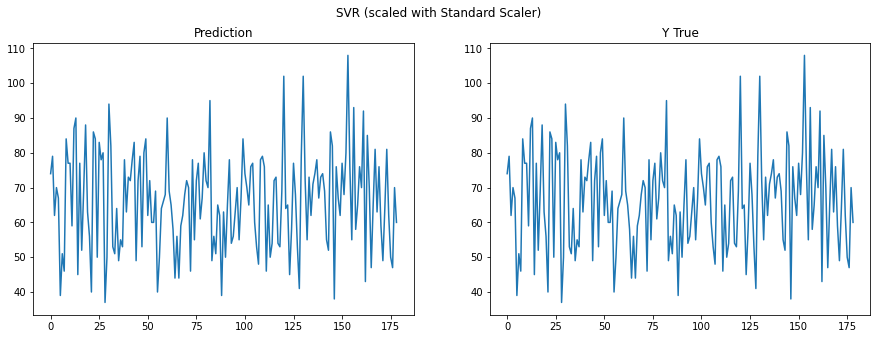

In [16]:
# with StandardScaler
SVR_regr_w_StandScaler = SVR()
params = {
    'C' : [1, 10, 12, 15, 22, 25, 30, 35, 40, 45, 50, 55,
           60, 70, 75, 80, 85, 90, 95, 100],
    'epsilon': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
    'kernel': ['linear', 'poly', 'rbf']
}
grid_SVR_StandScaler = GridSearchCV(estimator = SVR_regr_w_StandScaler,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

grid_SVR_StandScaler.fit(X_train_Stand_scaled, y_train)
print("Best estimator:", grid_SVR_StandScaler.best_estimator_)

y_pred_SVR_grid_with_StandScaler = grid_SVR_StandScaler.predict(X_test_Stand_scaled)
y_true = y_test

fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('SVR (scaled with Standard Scaler)\n')
axs[0].plot(y_pred_SVR_grid_with_StandScaler)
axs[0].set_title("Prediction")
axs[1].plot(y_true)
axs[1].set_title("Y True")

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best estimator: SVR(C=75, epsilon=0.0001, kernel='linear')


Text(0.5, 1.0, 'Y True')

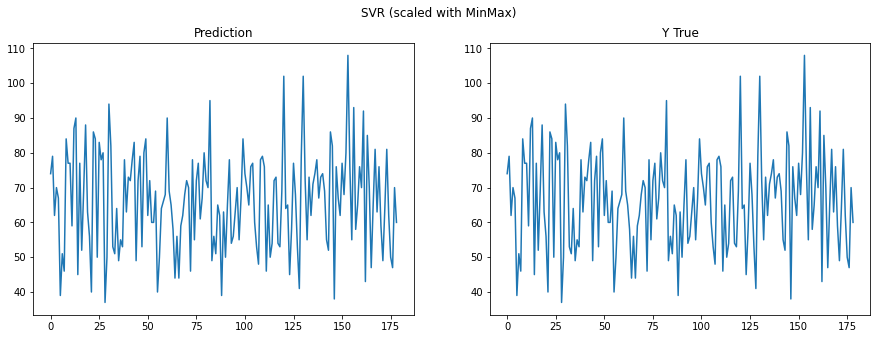

In [17]:
# with MinMax
SVR_regr_w_MinMax = SVR()
params = {
    'C' : [1, 10, 12, 15, 22, 25, 30, 35, 40, 45, 50, 55,
           60, 70, 75, 80, 85, 90, 95, 100],
    'epsilon': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
    'kernel': ['linear', 'poly', 'rbf']
}
grid_SVR_MinMaxScaler = GridSearchCV(estimator = SVR_regr_w_MinMax,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

grid_SVR_MinMaxScaler.fit(X_train_MinMax_scaled, y_train)
print("Best estimator:", grid_SVR_MinMaxScaler.best_estimator_)

y_pred_SVR_grid_with_MinMaxScaler = grid_SVR_MinMaxScaler.predict(X_test_MinMax_scaled)
y_true = y_test

fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('SVR (scaled with MinMax)\n')
axs[0].plot(y_pred_SVR_grid_with_MinMaxScaler)
axs[0].set_title("Prediction")
axs[1].plot(y_true)
axs[1].set_title("Y True")

# KNN

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best estimator: KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, weights='distance')


Text(0.5, 1.0, 'Y True')

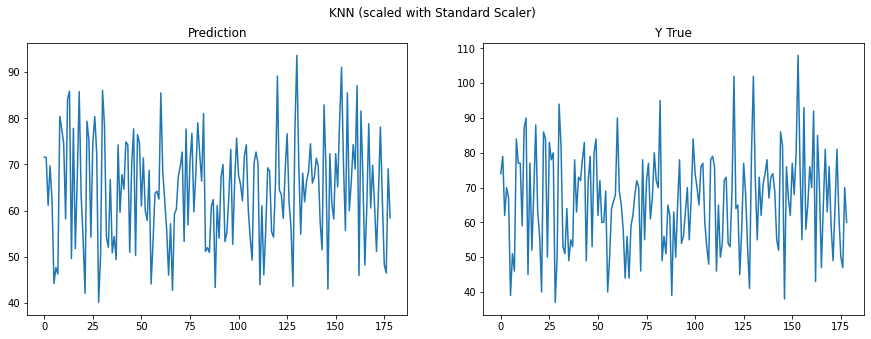

In [19]:
# Data with Standard Scaler
kn_Stand_Scaler = KNeighborsRegressor()
params = {
    'n_neighbors' : [3, 5, 10, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_kn_w_StandScaler = GridSearchCV(estimator = kn_Stand_Scaler,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn_w_StandScaler.fit(X_train_Stand_scaled, y_train)

print("Best estimator:", grid_kn_w_StandScaler.best_estimator_)

y_pred_KNN_grid_with_StandScaler = grid_kn_w_StandScaler.predict(X_test_Stand_scaled)
y_true = y_test

fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('KNN (scaled with Standard Scaler)\n')
axs[0].plot(y_pred_KNN_grid_with_StandScaler)
axs[0].set_title("Prediction")
axs[1].plot(y_true)
axs[1].set_title("Y True")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best estimator: KNeighborsRegressor(algorithm='ball_tree', weights='distance')


Text(0.5, 1.0, 'Y True')

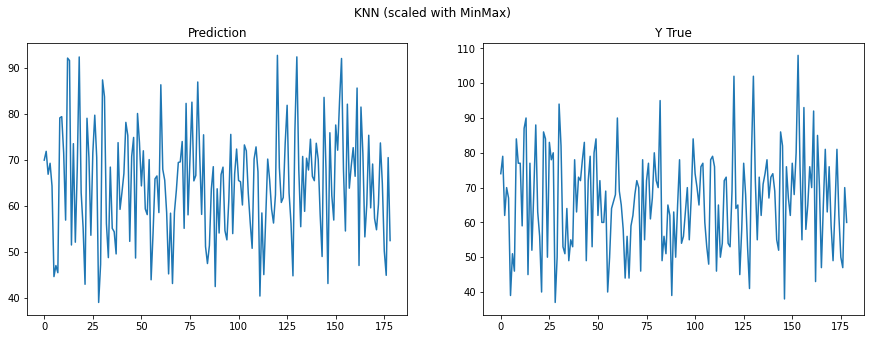

In [20]:
# Data with MinMax
kn_MinMax_Scaler = KNeighborsRegressor()
params = {
    'n_neighbors' : [3, 5, 10, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_kn_w_MinMax_Scaler = GridSearchCV(estimator = kn_MinMax_Scaler,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn_w_MinMax_Scaler.fit(X_train_MinMax_scaled, y_train)

print("Best estimator:", grid_kn_w_MinMax_Scaler.best_estimator_)

y_pred_KNN_grid_with_MinMaxScaler = grid_kn_w_MinMax_Scaler.predict(X_test_MinMax_scaled)
y_true = y_test

fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('KNN (scaled with MinMax)\n')
axs[0].plot(y_pred_KNN_grid_with_MinMaxScaler)
axs[0].set_title("Prediction")
axs[1].plot(y_true)
axs[1].set_title("Y True")

------------------------------------------------------------------------------------------------------------------------

# Development side (not used code):

In [ ]:
print(grid_kn.best_estimator_)

grid_y_pred = grid_kn.predict(X_test)

In [48]:
# Look for good value:
for c in range(1, 100):
    for e in [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9]:
        
        curr_SVM_regr = SVR(C=c, epsilon=e, kernel='rbf')
        curr_SVM_regr.fit(X_train, y_train)

        curr_y_pred = curr_SVM_regr.predict(X_test)
        curr_y_true = y_test

        print(f"C={c}, Eps={e}, RMSE={round(mean_squared_error(curr_y_true, curr_y_pred),2)}")
    print("\n")

C=1, Eps=0.0001, RMSE=38.92
C=1, Eps=0.001, RMSE=38.92
C=1, Eps=0.01, RMSE=38.91
C=1, Eps=0.1, RMSE=38.95
C=1, Eps=0.2, RMSE=39.03
C=1, Eps=0.5, RMSE=38.99
C=1, Eps=0.6, RMSE=38.93
C=1, Eps=0.9, RMSE=38.82


C=2, Eps=0.0001, RMSE=28.81
C=2, Eps=0.001, RMSE=28.81
C=2, Eps=0.01, RMSE=28.81
C=2, Eps=0.1, RMSE=28.84
C=2, Eps=0.2, RMSE=28.88
C=2, Eps=0.5, RMSE=28.88
C=2, Eps=0.6, RMSE=28.96
C=2, Eps=0.9, RMSE=29.26


C=3, Eps=0.0001, RMSE=24.46
C=3, Eps=0.001, RMSE=24.46
C=3, Eps=0.01, RMSE=24.46
C=3, Eps=0.1, RMSE=24.42
C=3, Eps=0.2, RMSE=24.4
C=3, Eps=0.5, RMSE=24.62
C=3, Eps=0.6, RMSE=24.72
C=3, Eps=0.9, RMSE=25.08


C=4, Eps=0.0001, RMSE=21.52
C=4, Eps=0.001, RMSE=21.52
C=4, Eps=0.01, RMSE=21.52
C=4, Eps=0.1, RMSE=21.51
C=4, Eps=0.2, RMSE=21.58
C=4, Eps=0.5, RMSE=21.9
C=4, Eps=0.6, RMSE=22.01
C=4, Eps=0.9, RMSE=22.45


C=5, Eps=0.0001, RMSE=19.53
C=5, Eps=0.001, RMSE=19.53
C=5, Eps=0.01, RMSE=19.53
C=5, Eps=0.1, RMSE=19.58
C=5, Eps=0.2, RMSE=19.66
C=5, Eps=0.5, RMSE=20.03
C=5, Eps=0.6, 

C=39, Eps=0.5, RMSE=12.6
C=39, Eps=0.6, RMSE=12.84
C=39, Eps=0.9, RMSE=13.55


C=40, Eps=0.0001, RMSE=11.43
C=40, Eps=0.001, RMSE=11.43
C=40, Eps=0.01, RMSE=11.45
C=40, Eps=0.1, RMSE=11.65
C=40, Eps=0.2, RMSE=11.87
C=40, Eps=0.5, RMSE=12.59
C=40, Eps=0.6, RMSE=12.82
C=40, Eps=0.9, RMSE=13.54


C=41, Eps=0.0001, RMSE=11.42
C=41, Eps=0.001, RMSE=11.42
C=41, Eps=0.01, RMSE=11.44
C=41, Eps=0.1, RMSE=11.64
C=41, Eps=0.2, RMSE=11.86
C=41, Eps=0.5, RMSE=12.59
C=41, Eps=0.6, RMSE=12.82
C=41, Eps=0.9, RMSE=13.54


C=42, Eps=0.0001, RMSE=11.42
C=42, Eps=0.001, RMSE=11.42
C=42, Eps=0.01, RMSE=11.44
C=42, Eps=0.1, RMSE=11.64
C=42, Eps=0.2, RMSE=11.87
C=42, Eps=0.5, RMSE=12.59
C=42, Eps=0.6, RMSE=12.83
C=42, Eps=0.9, RMSE=13.54


C=43, Eps=0.0001, RMSE=11.42
C=43, Eps=0.001, RMSE=11.42
C=43, Eps=0.01, RMSE=11.44
C=43, Eps=0.1, RMSE=11.64
C=43, Eps=0.2, RMSE=11.87
C=43, Eps=0.5, RMSE=12.59
C=43, Eps=0.6, RMSE=12.83
C=43, Eps=0.9, RMSE=13.55


C=44, Eps=0.0001, RMSE=11.42
C=44, Eps=0.001, RMSE=11.42


C=78, Eps=0.0001, RMSE=11.4
C=78, Eps=0.001, RMSE=11.4
C=78, Eps=0.01, RMSE=11.42
C=78, Eps=0.1, RMSE=11.61
C=78, Eps=0.2, RMSE=11.82
C=78, Eps=0.5, RMSE=12.57
C=78, Eps=0.6, RMSE=12.82
C=78, Eps=0.9, RMSE=13.55


C=79, Eps=0.0001, RMSE=11.4
C=79, Eps=0.001, RMSE=11.4
C=79, Eps=0.01, RMSE=11.42
C=79, Eps=0.1, RMSE=11.61
C=79, Eps=0.2, RMSE=11.82
C=79, Eps=0.5, RMSE=12.57
C=79, Eps=0.6, RMSE=12.82
C=79, Eps=0.9, RMSE=13.55


C=80, Eps=0.0001, RMSE=11.39
C=80, Eps=0.001, RMSE=11.4
C=80, Eps=0.01, RMSE=11.42
C=80, Eps=0.1, RMSE=11.61
C=80, Eps=0.2, RMSE=11.82
C=80, Eps=0.5, RMSE=12.57
C=80, Eps=0.6, RMSE=12.82
C=80, Eps=0.9, RMSE=13.55


C=81, Eps=0.0001, RMSE=11.39
C=81, Eps=0.001, RMSE=11.4
C=81, Eps=0.01, RMSE=11.42
C=81, Eps=0.1, RMSE=11.61
C=81, Eps=0.2, RMSE=11.82
C=81, Eps=0.5, RMSE=12.57
C=81, Eps=0.6, RMSE=12.82
C=81, Eps=0.9, RMSE=13.55


C=82, Eps=0.0001, RMSE=11.39
C=82, Eps=0.001, RMSE=11.4
C=82, Eps=0.01, RMSE=11.42
C=82, Eps=0.1, RMSE=11.61
C=82, Eps=0.2, RMSE=11.82
C=82, E

Text(0.5, 1.0, 'Y True')

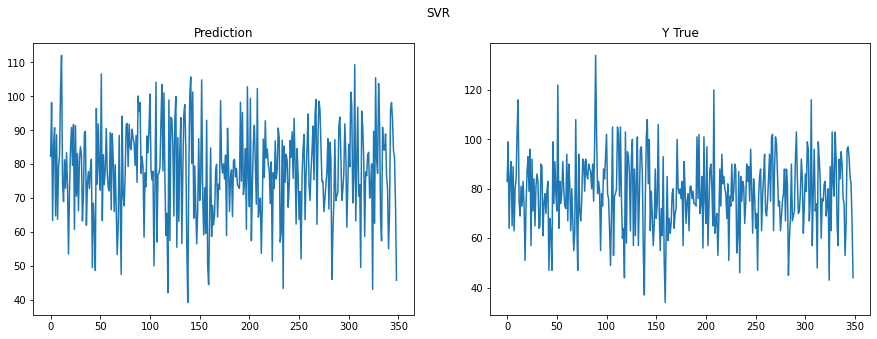

In [58]:
SVM_regr = SVR(C=40, epsilon=0.01, kernel='rbf')
SVM_regr.fit(X_train, y_train)

y_pred = SVM_regr.predict(X_test)
y_true = y_test

fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('SVR\n')
axs[0].plot(y_pred)
axs[0].set_title("Prediction")
axs[1].plot(y_true)
axs[1].set_title("Y True")

In [ ]:
########################################

# Using MinMax Scaler with range between 0 and 1:

In [59]:
X = covid_data.loc[:, covid_data.columns != 'daily_crime_count'].values
y = covid_data['daily_crime_count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


from sklearn.preprocessing import MinMaxScaler

MinMax_scaler = MinMaxScaler(feature_range=(0, 1))

MinMax_scaler = MinMax_scaler.fit(X_train)

X_train = MinMax_scaler.transform(X_train)
X_test = MinMax_scaler.transform(X_test)

In [60]:
X_train[:3]

array([[0.        , 0.45454545, 0.30769231, 0.        , 0.3125    ,
        0.25      , 0.        , 0.60714286, 0.45      , 0.37037037,
        0.51428571, 0.76470588, 0.25      , 0.33333333, 0.56521739,
        0.36363636, 0.72222222, 0.725     , 0.58181818, 0.36170213],
       [0.        , 0.36363636, 0.15384615, 0.        , 0.25      ,
        0.375     , 0.33333333, 0.17857143, 0.36666667, 0.18518519,
        0.28571429, 0.05882353, 0.5       , 0.2962963 , 0.43478261,
        0.45454545, 0.33333333, 0.35      , 0.36363636, 0.31914894],
       [0.        , 0.18181818, 0.46153846, 0.        , 0.25      ,
        0.125     , 0.16666667, 0.23214286, 0.43333333, 0.2962963 ,
        0.31428571, 0.35294118, 0.45      , 0.44444444, 0.2173913 ,
        0.31818182, 0.33333333, 0.575     , 0.27272727, 0.31914894]])

In [61]:
X_test[:3]

array([[0.        , 0.45454545, 0.15384615, 0.33333333, 0.3125    ,
        0.125     , 0.        , 0.30357143, 0.38333333, 0.40740741,
        0.25714286, 0.17647059, 0.2       , 0.33333333, 0.43478261,
        0.40909091, 0.55555556, 0.35      , 0.43636364, 0.34042553],
       [0.        , 0.36363636, 0.07692308, 0.33333333, 0.3125    ,
        0.1875    , 0.        , 0.375     , 0.25      , 0.22222222,
        0.34285714, 0.35294118, 0.45      , 0.33333333, 0.39130435,
        0.27272727, 0.16666667, 0.35      , 0.36363636, 0.31914894],
       [0.        , 0.27272727, 0.        , 0.        , 0.4375    ,
        0.3125    , 0.16666667, 0.23214286, 0.46666667, 0.48148148,
        0.17142857, 0.05882353, 0.15      , 0.40740741, 0.73913043,
        0.5       , 0.27777778, 0.3       , 0.36363636, 0.5106383 ]])

In [62]:
from sklearn.svm import SVR

In [63]:
for c in range(1, 100):
    for e in [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9]:
        
        curr_SVM_regr = SVR(C=c, epsilon=e, kernel='rbf')
        curr_SVM_regr.fit(X_train, y_train)

        curr_y_pred = curr_SVM_regr.predict(X_test)
        curr_y_true = y_test

        print(f"C={c}, Eps={e}, RMSE={round(mean_squared_error(curr_y_true, curr_y_pred),2)}")
    print("\n")

C=1, Eps=0.0001, RMSE=13.44
C=1, Eps=0.001, RMSE=13.44
C=1, Eps=0.01, RMSE=13.44
C=1, Eps=0.1, RMSE=13.4
C=1, Eps=0.2, RMSE=13.32
C=1, Eps=0.5, RMSE=13.45
C=1, Eps=0.6, RMSE=13.51
C=1, Eps=0.9, RMSE=13.58


C=2, Eps=0.0001, RMSE=9.64
C=2, Eps=0.001, RMSE=9.65
C=2, Eps=0.01, RMSE=9.65
C=2, Eps=0.1, RMSE=9.66
C=2, Eps=0.2, RMSE=9.67
C=2, Eps=0.5, RMSE=9.82
C=2, Eps=0.6, RMSE=9.84
C=2, Eps=0.9, RMSE=10.09


C=3, Eps=0.0001, RMSE=7.85
C=3, Eps=0.001, RMSE=7.85
C=3, Eps=0.01, RMSE=7.85
C=3, Eps=0.1, RMSE=7.8
C=3, Eps=0.2, RMSE=7.81
C=3, Eps=0.5, RMSE=7.98
C=3, Eps=0.6, RMSE=8.07
C=3, Eps=0.9, RMSE=8.22


C=4, Eps=0.0001, RMSE=6.59
C=4, Eps=0.001, RMSE=6.59
C=4, Eps=0.01, RMSE=6.59
C=4, Eps=0.1, RMSE=6.59
C=4, Eps=0.2, RMSE=6.6
C=4, Eps=0.5, RMSE=6.79
C=4, Eps=0.6, RMSE=6.91
C=4, Eps=0.9, RMSE=7.16


C=5, Eps=0.0001, RMSE=5.78
C=5, Eps=0.001, RMSE=5.78
C=5, Eps=0.01, RMSE=5.78
C=5, Eps=0.1, RMSE=5.85
C=5, Eps=0.2, RMSE=5.9
C=5, Eps=0.5, RMSE=6.13
C=5, Eps=0.6, RMSE=6.19
C=5, Eps=0.9, RMSE=6.

C=41, Eps=0.0001, RMSE=2.43
C=41, Eps=0.001, RMSE=2.43
C=41, Eps=0.01, RMSE=2.44
C=41, Eps=0.1, RMSE=2.57
C=41, Eps=0.2, RMSE=2.7
C=41, Eps=0.5, RMSE=3.1
C=41, Eps=0.6, RMSE=3.24
C=41, Eps=0.9, RMSE=3.61


C=42, Eps=0.0001, RMSE=2.43
C=42, Eps=0.001, RMSE=2.43
C=42, Eps=0.01, RMSE=2.44
C=42, Eps=0.1, RMSE=2.57
C=42, Eps=0.2, RMSE=2.7
C=42, Eps=0.5, RMSE=3.1
C=42, Eps=0.6, RMSE=3.24
C=42, Eps=0.9, RMSE=3.61


C=43, Eps=0.0001, RMSE=2.43
C=43, Eps=0.001, RMSE=2.43
C=43, Eps=0.01, RMSE=2.44
C=43, Eps=0.1, RMSE=2.57
C=43, Eps=0.2, RMSE=2.7
C=43, Eps=0.5, RMSE=3.11
C=43, Eps=0.6, RMSE=3.24
C=43, Eps=0.9, RMSE=3.61


C=44, Eps=0.0001, RMSE=2.43
C=44, Eps=0.001, RMSE=2.43
C=44, Eps=0.01, RMSE=2.44
C=44, Eps=0.1, RMSE=2.57
C=44, Eps=0.2, RMSE=2.7
C=44, Eps=0.5, RMSE=3.11
C=44, Eps=0.6, RMSE=3.25
C=44, Eps=0.9, RMSE=3.62


C=45, Eps=0.0001, RMSE=2.43
C=45, Eps=0.001, RMSE=2.43
C=45, Eps=0.01, RMSE=2.44
C=45, Eps=0.1, RMSE=2.57
C=45, Eps=0.2, RMSE=2.7
C=45, Eps=0.5, RMSE=3.11
C=45, Eps=0.6, RMSE

C=81, Eps=0.0001, RMSE=2.42
C=81, Eps=0.001, RMSE=2.42
C=81, Eps=0.01, RMSE=2.43
C=81, Eps=0.1, RMSE=2.54
C=81, Eps=0.2, RMSE=2.67
C=81, Eps=0.5, RMSE=3.08
C=81, Eps=0.6, RMSE=3.23
C=81, Eps=0.9, RMSE=3.59


C=82, Eps=0.0001, RMSE=2.42
C=82, Eps=0.001, RMSE=2.42
C=82, Eps=0.01, RMSE=2.43
C=82, Eps=0.1, RMSE=2.54
C=82, Eps=0.2, RMSE=2.67
C=82, Eps=0.5, RMSE=3.08
C=82, Eps=0.6, RMSE=3.23
C=82, Eps=0.9, RMSE=3.59


C=83, Eps=0.0001, RMSE=2.42
C=83, Eps=0.001, RMSE=2.42
C=83, Eps=0.01, RMSE=2.43
C=83, Eps=0.1, RMSE=2.54
C=83, Eps=0.2, RMSE=2.67
C=83, Eps=0.5, RMSE=3.08
C=83, Eps=0.6, RMSE=3.23
C=83, Eps=0.9, RMSE=3.59


C=84, Eps=0.0001, RMSE=2.42
C=84, Eps=0.001, RMSE=2.42
C=84, Eps=0.01, RMSE=2.43
C=84, Eps=0.1, RMSE=2.54
C=84, Eps=0.2, RMSE=2.67
C=84, Eps=0.5, RMSE=3.08
C=84, Eps=0.6, RMSE=3.23
C=84, Eps=0.9, RMSE=3.59


C=85, Eps=0.0001, RMSE=2.42
C=85, Eps=0.001, RMSE=2.42
C=85, Eps=0.01, RMSE=2.43
C=85, Eps=0.1, RMSE=2.54
C=85, Eps=0.2, RMSE=2.67
C=85, Eps=0.5, RMSE=3.08
C=85, Eps=0.

Text(0.5, 1.0, 'Y True')

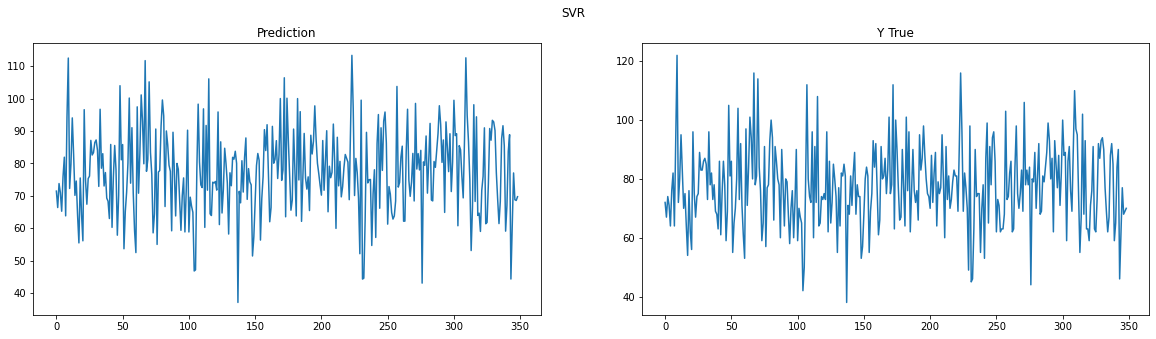

In [65]:
SVM_regr = SVR(C=18, epsilon=0.1, kernel='rbf')
SVM_regr.fit(X_train, y_train)

y_pred = SVM_regr.predict(X_test)
y_true = y_test

fig, axs = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('SVR\n')
axs[0].plot(y_pred)
axs[0].set_title("Prediction")
axs[1].plot(y_true)
axs[1].set_title("Y True")

# KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn.fit(X_train, y_train)